## Importing Libraries

In [1]:
import os

import pandas as pd

import nltk

#Importing text corpora and preprocessing modules

nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#Importing regular expressions lib
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Checking the count of recording files in Train, Test, and Validate folders

In [ ]:
train_path = 'recordings/train'
test_path = 'recordings/test'
validate_path = 'recordings/validate'

def count_audio_files(folder_path):
    audio_count = 0
    for file in os.listdir(folder_path):
        if file.endswith('.wav') or file.endswith('.mp3') or file.endswith('.flac'):
            audio_count += 1
    return audio_count

In [ ]:
counts_df = pd.DataFrame(columns=['Folder', 'Audio_Count'])

counts_df.loc[0] = ['Train', count_audio_files(train_path)]
counts_df.loc[1] = ['Test', count_audio_files(test_path)]
counts_df.loc[2] = ['Validate', count_audio_files(validate_path)]

In [ ]:
print(counts_df)

     Folder  Audio_Count
0     Train          381
1      Test         5895
2  Validate          385


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Exploring the Overview of recording CSV file

In [3]:
file_path = 'drive/MyDrive/overview-of-recordings.csv'

df = pd.read_csv(file_path)

In [4]:
df.head(5)

audio_clipping  audio_clipping:confidence background_noise_audible  \
0     no_clipping                     1.0000              light_noise   
1  light_clipping                     0.6803                 no_noise   
2     no_clipping                     1.0000                 no_noise   
3     no_clipping                     1.0000              light_noise   
4     no_clipping                     1.0000                 no_noise   

   background_noise_audible:confidence  overall_quality_of_the_audio  \
0                               1.0000                          3.33   
1                               0.6803                          3.33   
2                               0.6655                          3.33   
3                               1.0000                          3.33   
4                               1.0000                          4.67   

     quiet_speaker  quiet_speaker:confidence  speaker_id  \
0  audible_speaker                       1.0    43453425   
1  audible_speaker                       1.0    43719934   
2  audible_speaker                       1.0    43719934   
3  audible_speaker                       1.0    31349958   
4  audible_speaker                       1.0    43719934   

                                       file_download  \
0  https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...   
1  https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...   
2  https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...   
3  https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...   
4  https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...   

                       file_name  \
0  1249120_43453425_58166571.wav   
1  1249120_43719934_43347848.wav   
2  1249120_43719934_53187202.wav   
3  1249120_31349958_55816195.wav   
4  1249120_43719934_82524191.wav   

                                              phrase            prompt  \
0                    When I remember her I feel down    Emotional pain   
1  When I carry heavy things I feel like breaking...  Hair falling out   
2          there is too much pain when i move my arm       Heart hurts   
3  My son had his lip pierced and it is swollen a...    Infected wound   
4             My muscles in my lower back are aching    Infected wound   

   writer_id  
0   21665495  
1   44088126  
2   44292353  
3   43755034  
4   21665495

In [5]:
df.describe()

audio_clipping:confidence  background_noise_audible:confidence  \
count                6661.000000                          6661.000000   
mean                    0.984625                             0.854320   
std                     0.070909                             0.165967   
min                     0.337800                             0.336300   
25%                     1.000000                             0.671100   
50%                     1.000000                             1.000000   
75%                     1.000000                             1.000000   
max                     1.000000                             1.000000   

       overall_quality_of_the_audio  quiet_speaker:confidence    speaker_id  \
count                   6661.000000               6661.000000  6.661000e+03   
mean                       3.678268                  0.984594  3.664962e+07   
std                        0.378536                  0.069719  1.029919e+07   
min                        3.000000                  0.342300  1.853182e+06   
25%                        3.330000                  1.000000  3.482490e+07   
50%                        3.670000                  1.000000  4.120334e+07   
75%                        4.000000                  1.000000  4.385622e+07   
max                        5.000000                  1.000000  4.444235e+07   

          writer_id  
count  6.661000e+03  
mean   3.596655e+07  
std    1.341818e+07  
min    1.883056e+06  
25%    3.498746e+07  
50%    4.375503e+07  
75%    4.411874e+07  
max    4.434011e+07

In [ ]:
df.info()

In [6]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()

Unique values in column 'audio_clipping':
['no_clipping' 'light_clipping']

Unique values in column 'audio_clipping:confidence':
[1.     0.6803 0.6978 0.6609 0.6986 0.6438 0.6503 0.6555 0.6575 0.3378
 0.6757 0.6622 0.6486 0.6824 0.6623 0.6624 0.6815 0.6627 0.6631 0.7017
 0.6813 0.6667 0.6599 0.6701 0.6596 0.6644 0.6724 0.3523 0.6874 0.3506
 0.6556 0.6759 0.6695 0.6475 0.6577 0.651  0.6867 0.6871 0.6908 0.6944
 0.6984 0.6406 0.6918 0.6607 0.6861 0.6959 0.6769 0.6528 0.668  0.662
 0.3494 0.6553 0.6842 0.692  0.6554 0.6412 0.6458 0.6446 0.6776 0.672
 0.6849 0.6761 0.6567 0.6645 0.6689 0.6467 0.6625 0.6711 0.671  0.6533
 0.6774 0.6822 0.6957 0.6889 0.6648 0.6579 0.634  0.686  0.678  0.6445
 0.653  0.6834 0.64   0.6679 0.6621 0.6661 0.6422 0.6926 0.7067 0.6777
 0.6432 0.6414 0.6729 0.6566 0.635  0.6853 0.6727 0.68   0.6601 0.7007
 0.6531 0.649  0.6739 0.6847 0.6789 0.7117 0.6515 0.3472 0.6419 0.6656
 0.6725 0.6835 0.6617 0.6702 0.6979 0.6633 0.6923 0.6885 0.6712 0.6525
 0.6723 0.666  0.66  

In [7]:
def preprocess_text(text):
  text = re.sub(r'[^a-zA-Z\s]','',text) #removing special character and digits
  text = text.lower()
  return text

In [8]:
df['phrase'] = df['phrase'].apply(preprocess_text)

In [14]:
df['phrase'].head(5)

0                      when i remember her i feel down
1    when i carry heavy things i feel like breaking...
2            there is too much pain when i move my arm
3    my son had his lip pierced and it is swollen a...
4               my muscles in my lower back are aching
Name: phrase, dtype: object

In [11]:
def corpus(text):
    text_list = text.split()
    return text_list

In [ ]:
df['phrase_lists'] = df['phrase'].apply(corpus)
df.head(10)

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk

from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

# Term Frequency Analysis

In [19]:
corpus = []
for i in trange(df.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus += df['phrase_lists'][i]
len(corpus)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 6661/6661 [00:00<00:00, 24892.09it/s]


70148

In [20]:
mostCommon = Counter(corpus).most_common(10)
mostCommon

[('i', 6954),
 ('my', 4691),
 ('a', 2107),
 ('in', 1963),
 ('have', 1617),
 ('pain', 1604),
 ('feel', 1533),
 ('and', 1528),
 ('the', 1478),
 ('when', 1424)]

In [21]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

<ipython-input-27-21884489529e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq, y=words, palette=colors)


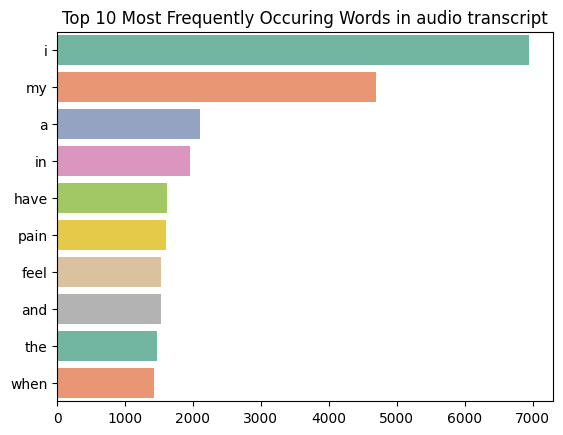

In [27]:
colors = sns.color_palette('Set2', n_colors=len(freq))
sns.barplot(x=freq, y=words, palette=colors)
plt.title('Top 10 Most Frequently Occuring Words in audio transcript')
plt.show()

# Most frequently occuring n-grams

In [24]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(df['phrase'])

In [25]:
count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

<ipython-input-28-7056d338b372>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10], palette=colors)


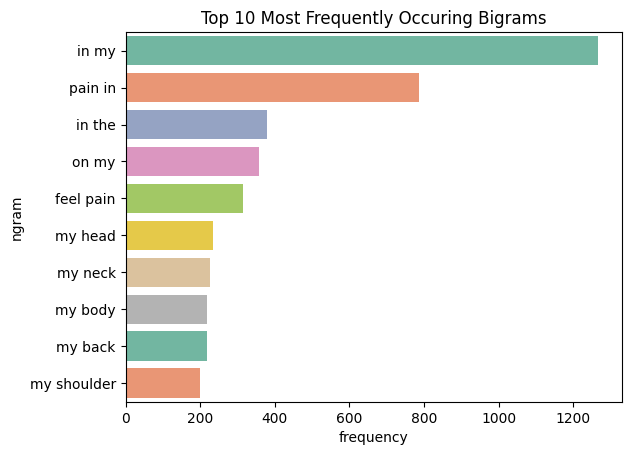

In [28]:
colors = sns.color_palette('Set2', n_colors=len(freq))
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10], palette=colors)
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

In [29]:
cv1 = CountVectorizer(ngram_range=(3,3))
trigrams = cv1.fit_transform(df['phrase'])
count_values = trigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

<ipython-input-30-55c6a7d7c3c9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10], palette=colors)


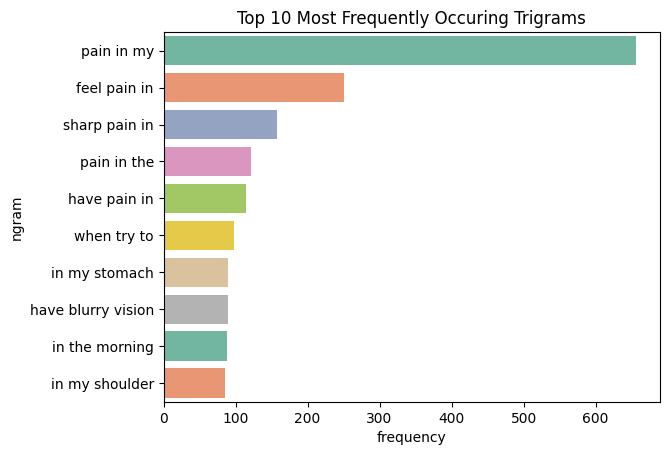

In [30]:
colors = sns.color_palette('Set2', n_colors=len(freq))
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10], palette=colors)
plt.title('Top 10 Most Frequently Occuring Trigrams')
plt.show()

# Word Clouds

In [31]:
!pip install wordcloud

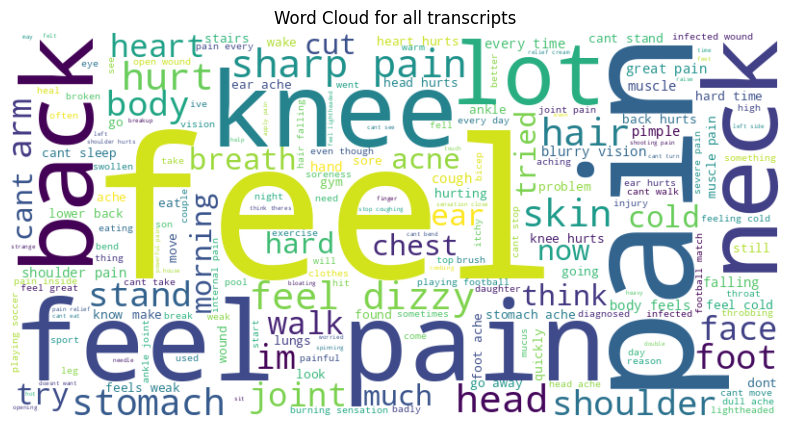

In [34]:
from wordcloud import WordCloud

text_data = ' '.join(df['phrase'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud for all transcripts")
plt.axis('off')
plt.show()


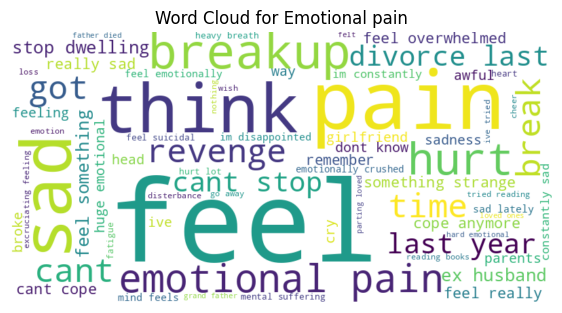

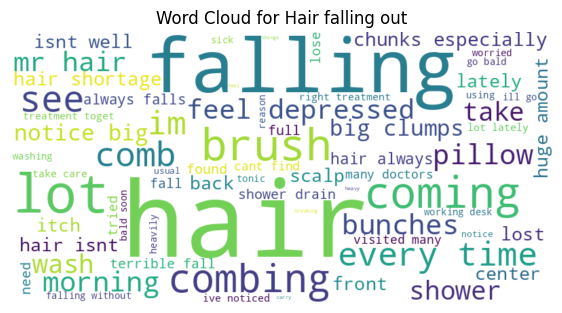

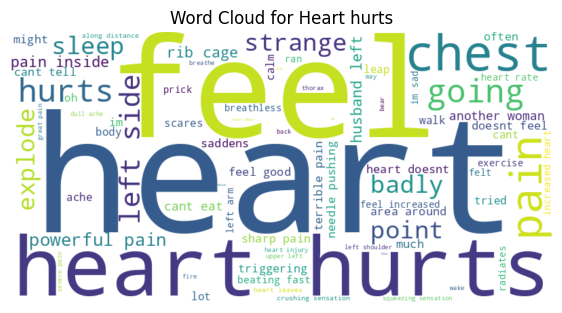

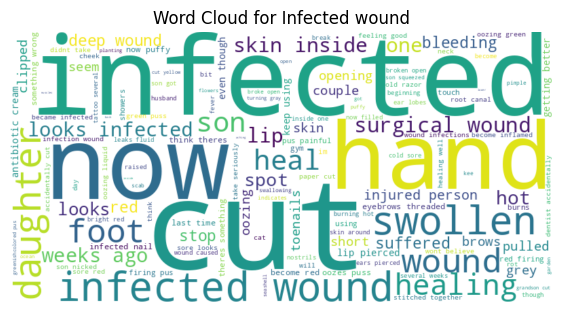

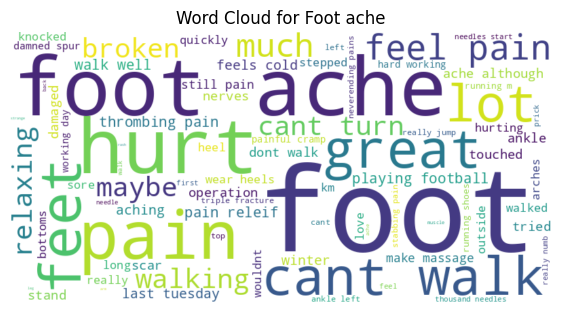

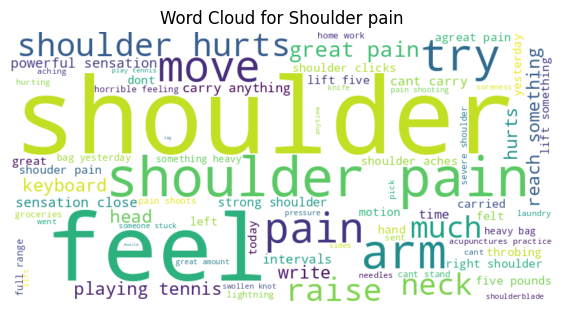

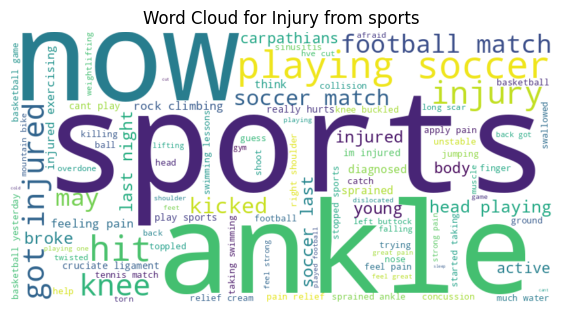

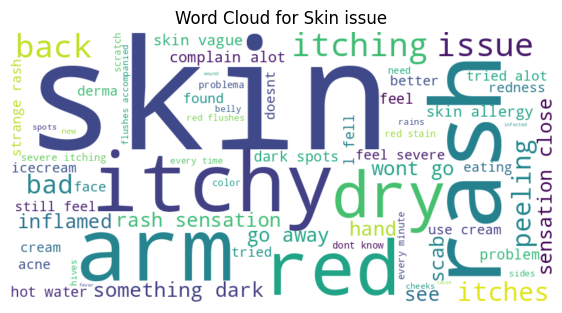

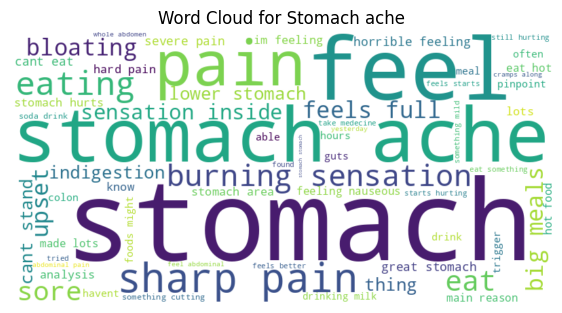

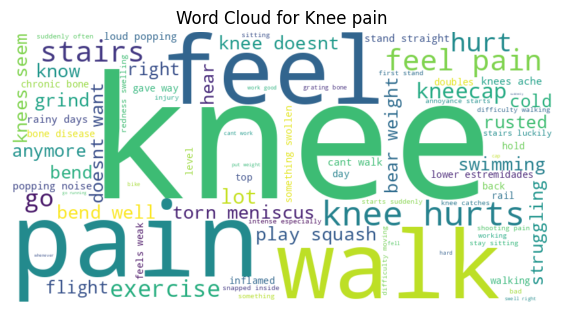

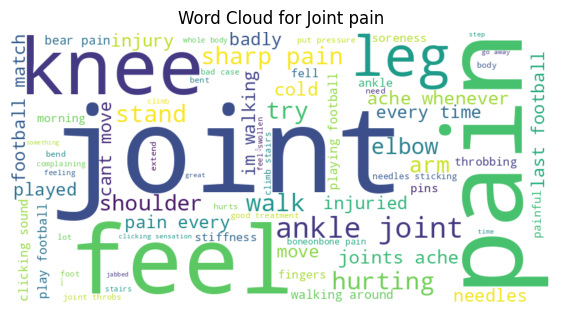

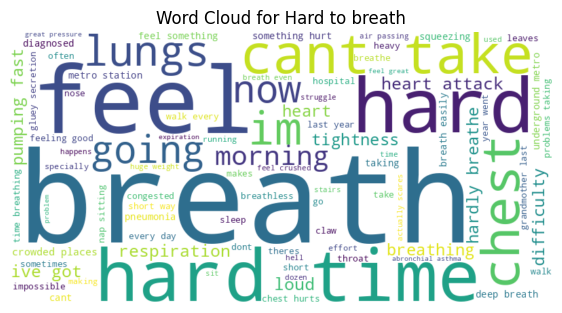

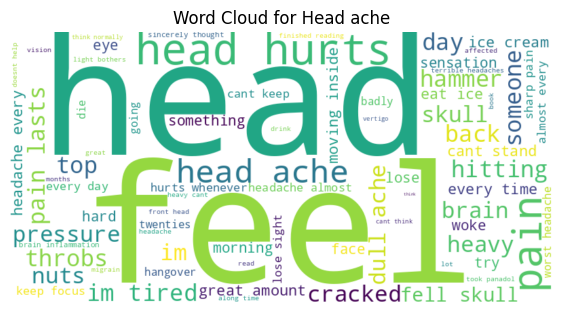

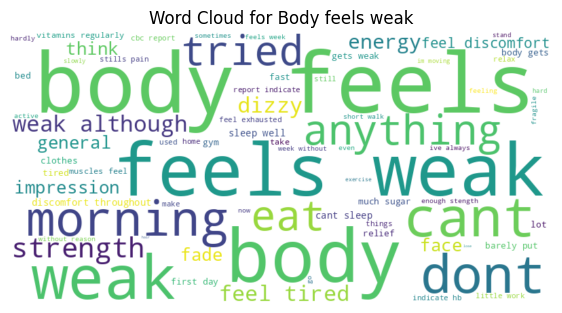

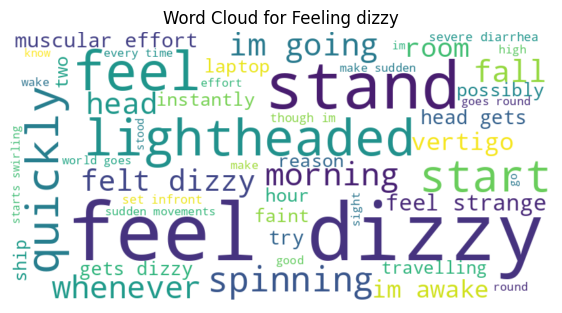

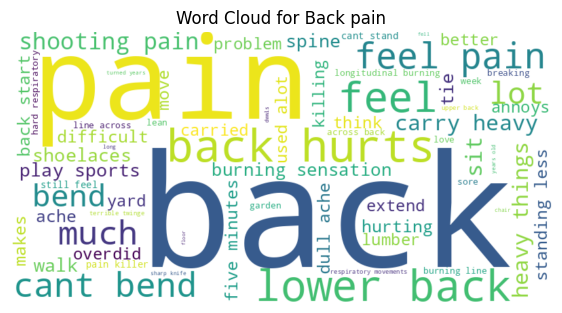

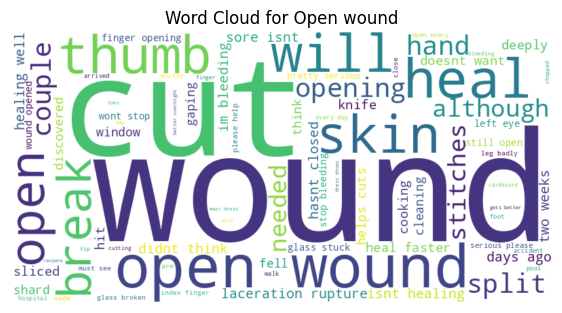

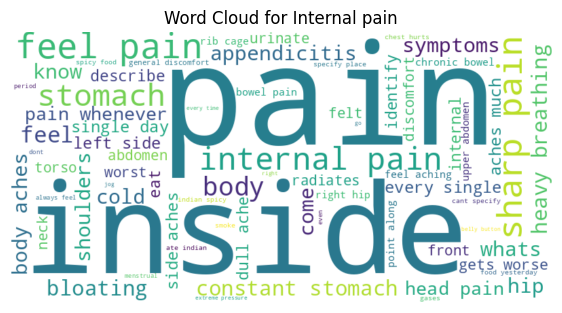

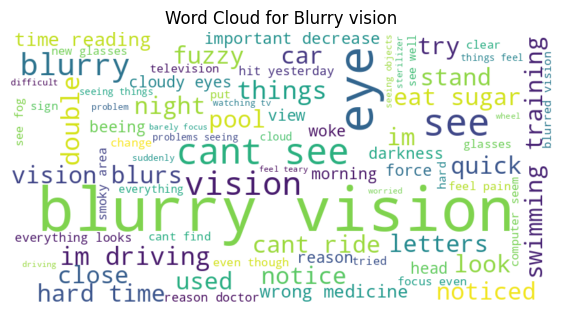

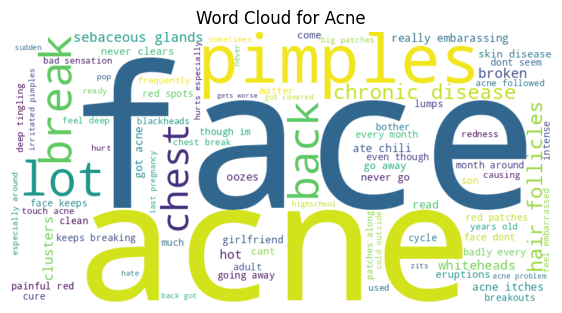

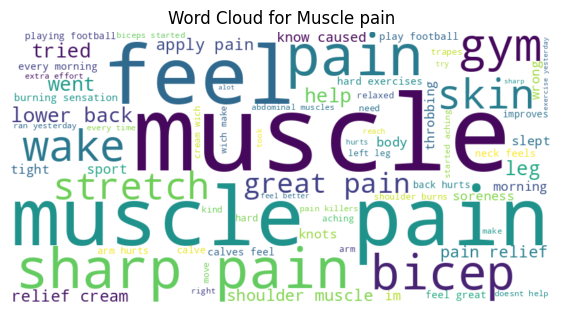

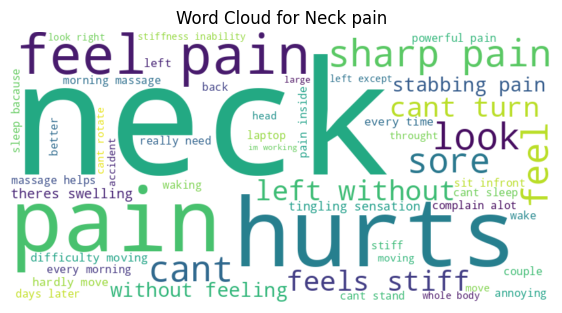

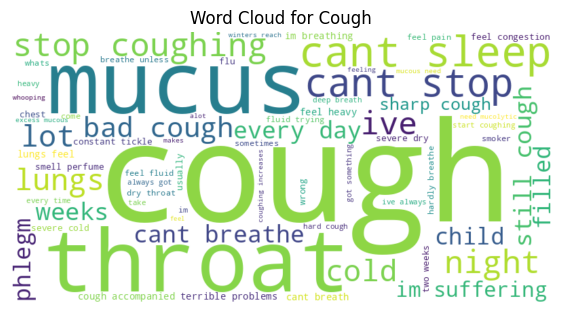

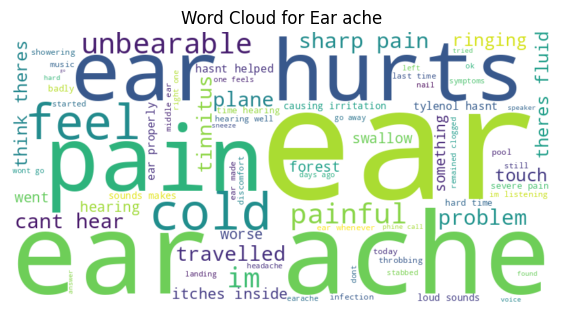

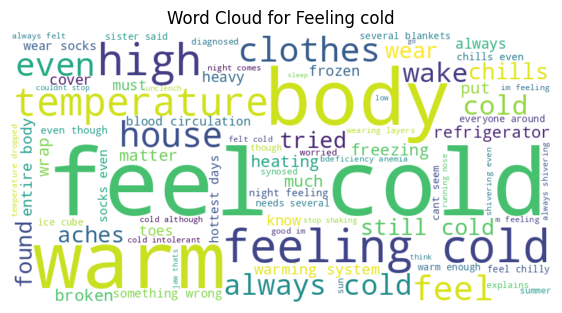

In [35]:
unique_labels = df['prompt'].unique()

for prompt in unique_labels:
    # Extract text data for the current label
    text_data = ' '.join(df[df['prompt'] == prompt]['phrase'])

    # Generate word cloud for the current label
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(7, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {prompt}')
    plt.axis('off')  # Turn off axis labels
    plt.show()
